<a href="https://colab.research.google.com/github/igorjoz/machine-learning-course-and-projects/blob/main/16_KNN_algorithm_iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Sekcja 1: Import bibliotek
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import math

In [ ]:
#Sekcja 2 - Wczytanie i zapoznanie z danymi

# Wczytanie zbioru danych Iris z seaborn
df = sns.load_dataset("iris")

# Wyświetlenie pierwszych 10 rekordów
print("\nPierwsze 10 rekordów ze zbioru danych Iris:")
print(df.head(10))

# Wyświetlenie opisu zbioru danych
print("\nOpis zbioru danych Iris:")
print("Liczba próbek:", len(df))
print("Liczba cech:", len(df.columns) - 1)
print("Cechy:", [col for col in df.columns if col != "species"])
print("Gatunki:", df['species'].unique())

# Wyświetlenie liczby próbek dla poszczególnych gatunków
print("\nRozkład gatunków:")
print(df['species'].value_counts())


Pierwsze 10 rekordów ze zbioru danych Iris:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa

Opis zbioru danych Iris:
Liczba próbek: 150
Liczba cech: 4
Cechy: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Gatunki: ['setosa' 'versicolor' 'virginica']

Rozkład gatunków:
species
setosa        50
versicolor    50
virginica     5

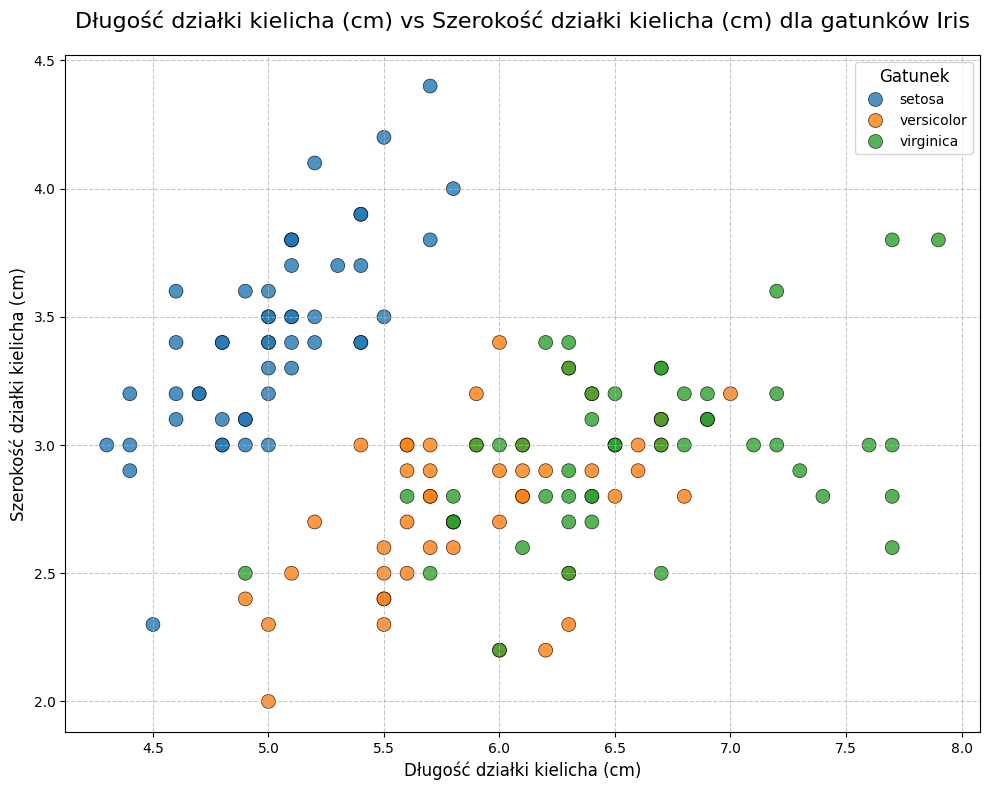

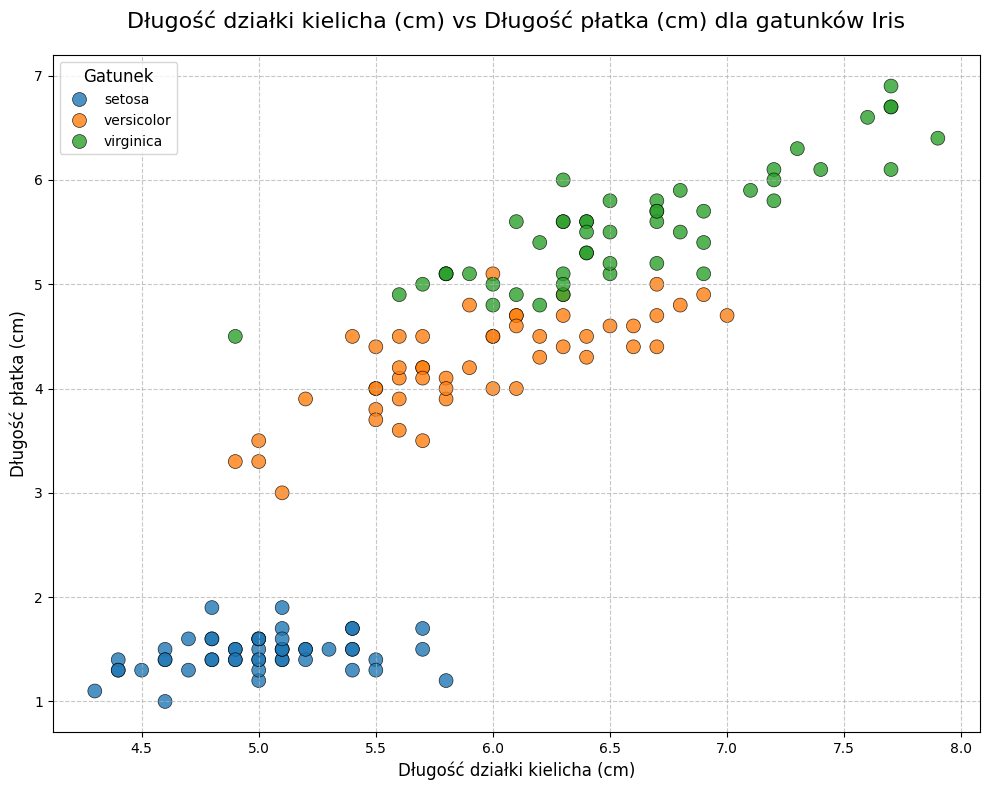

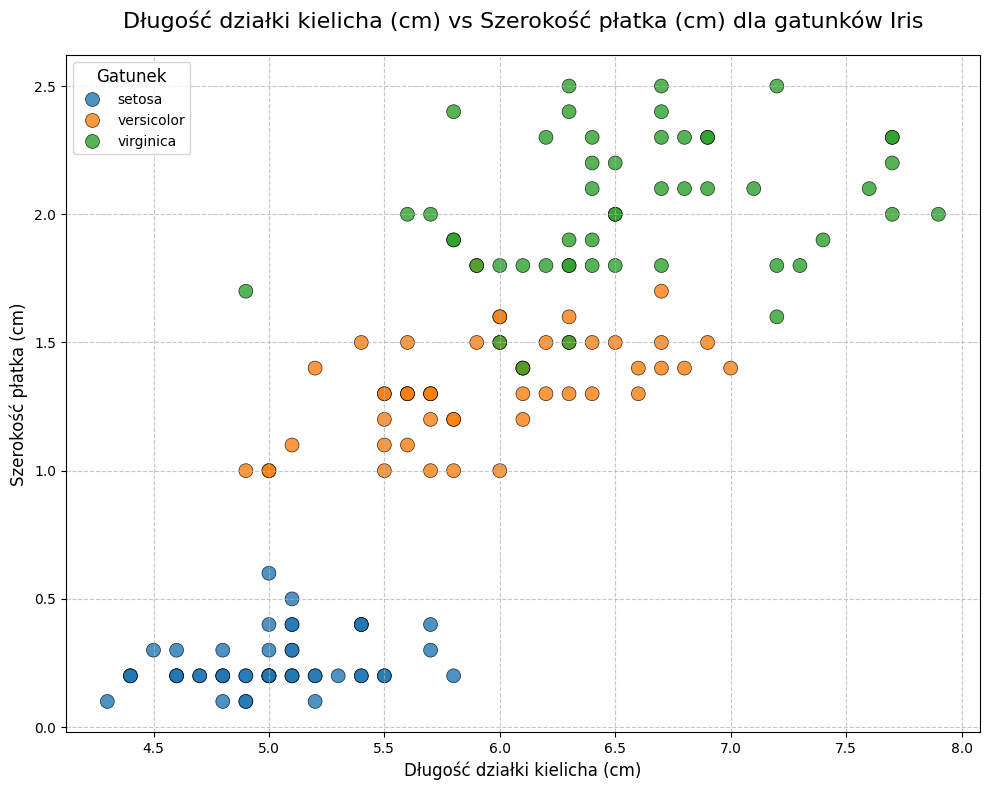

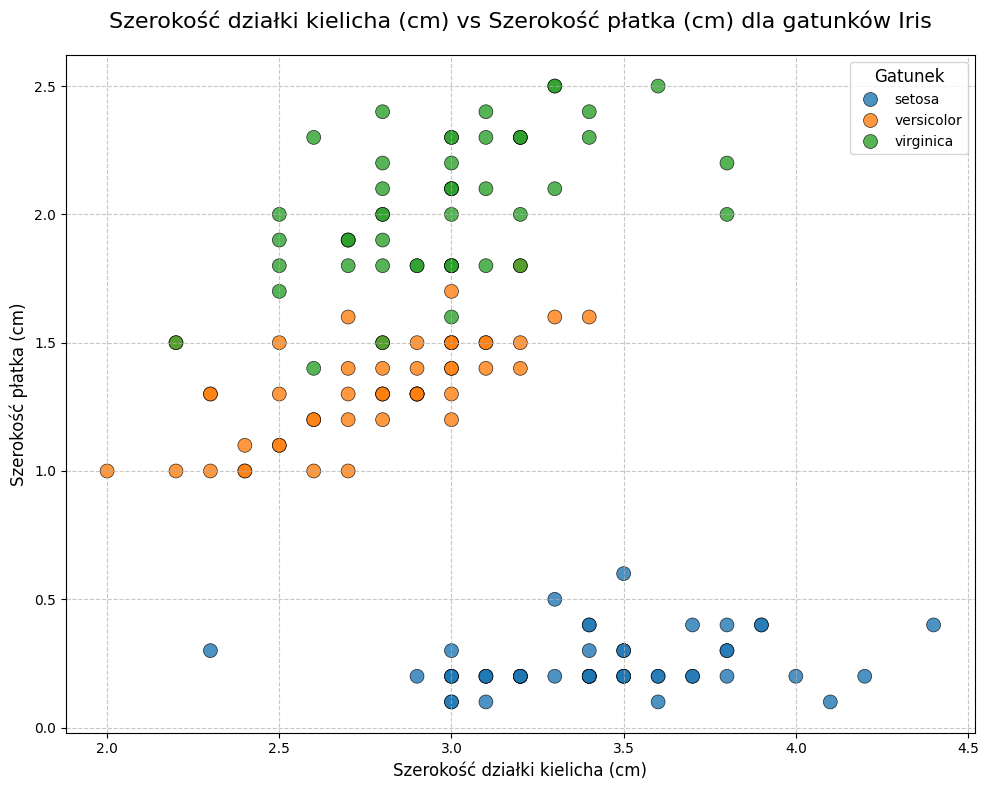

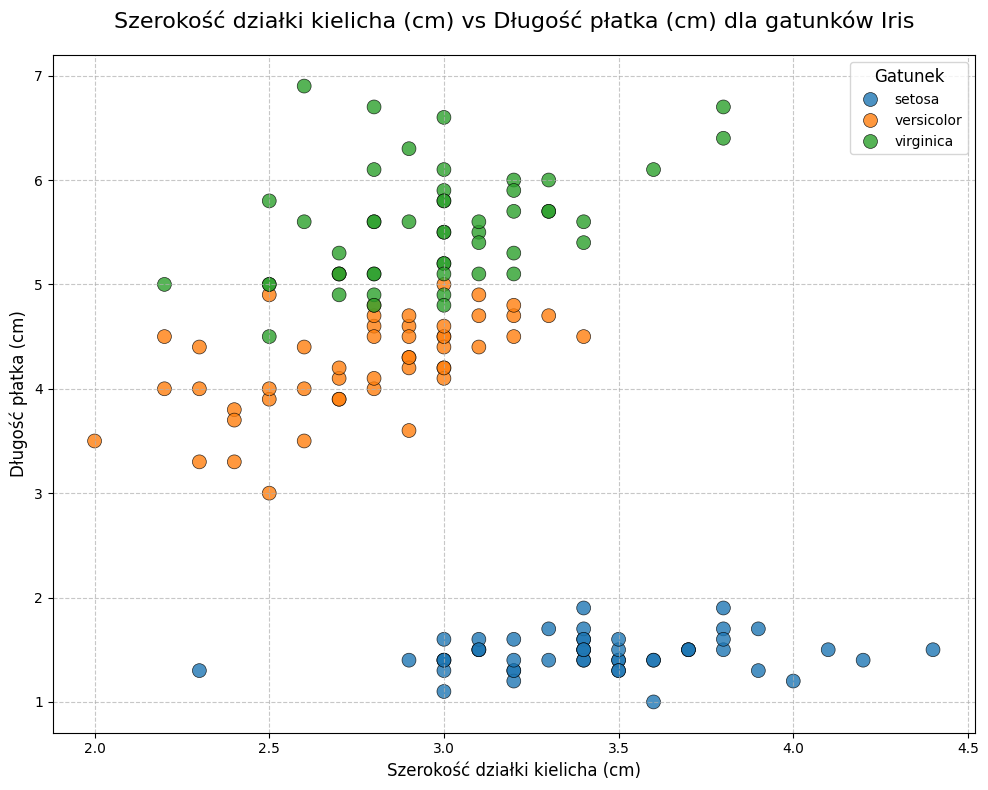

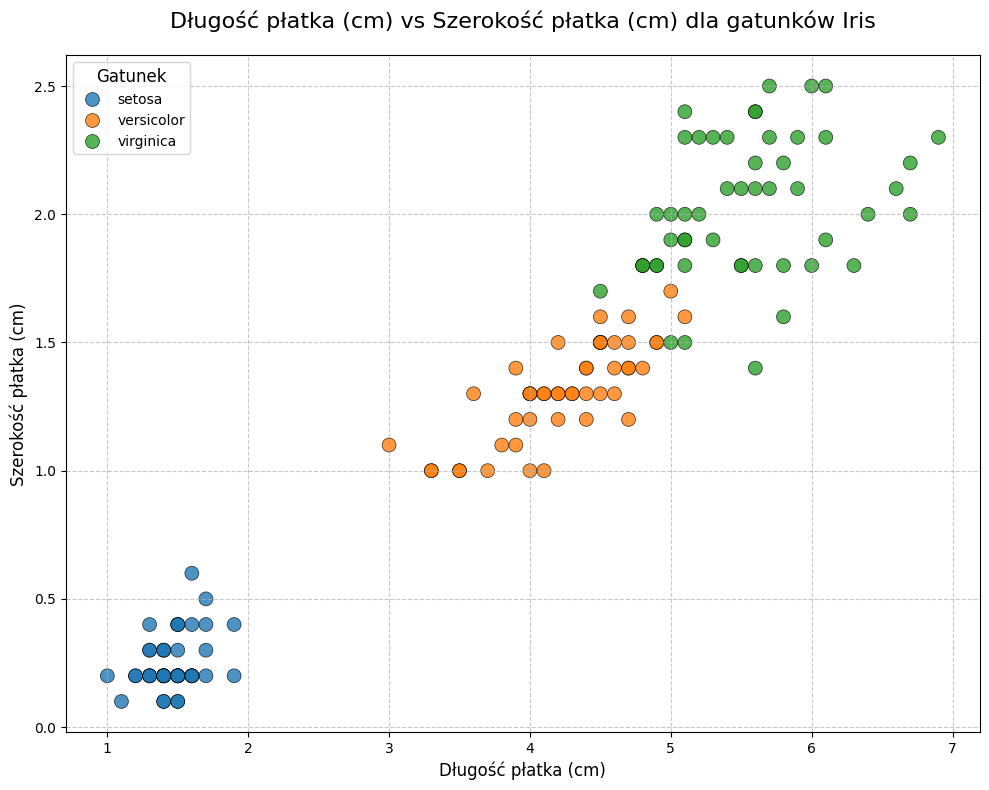

In [ ]:
#Sekcja 3 - Generowanie wykresów

# Nowe pary cech (zgodne z seaborn)
feature_pairs = [
    ('sepal_length', 'sepal_width'),
    ('sepal_length', 'petal_length'),
    ('sepal_length', 'petal_width'),
    ('sepal_width', 'petal_width'),
    ('sepal_width', 'petal_length'),
    ('petal_length', 'petal_width')
]

# Polskie nazwy cech
feature_names_pl = {
    'sepal_length': 'Długość działki kielicha (cm)',
    'sepal_width': 'Szerokość działki kielicha (cm)',
    'petal_length': 'Długość płatka (cm)',
    'petal_width': 'Szerokość płatka (cm)'
}


# Tworzenie wykresów w pętli
for x_feature, y_feature in feature_pairs:
    plt.figure(figsize=(10, 8))

    scatter = sns.scatterplot(
        data=df,
        x=x_feature,
        y=y_feature,
        hue='species',
        s=100,
        alpha=0.8,
        edgecolor='k',
        linewidth=0.5
    )

    x_name_pl = feature_names_pl[x_feature]
    y_name_pl = feature_names_pl[y_feature]

    plt.title(f'{x_name_pl} vs {y_name_pl} dla gatunków Iris', fontsize=16, pad=20)
    plt.xlabel(x_name_pl, fontsize=12)
    plt.ylabel(y_name_pl, fontsize=12)


    plt.legend(title='Gatunek', fontsize=10, title_fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.show()

In [ ]:
#Sekcja 4 - Przygotowanie danych dla algorytmu

# Podział danych na cechy (X) i etykiety (y)
X = df.drop(columns="species").values
y = df["species"].values

# Podział na zbiór uczący i testowy z przetasowaniem danych
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y
)

# Informacje o podziale
print("\nPodział danych na zbiór uczący i testowy:")
print(f"Liczba próbek w zbiorze uczącym: {X_train.shape[0]} ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Liczba próbek w zbiorze testowym: {X_test.shape[0]} ({X_test.shape[0]/len(df)*100:.1f}%)")

# Rozkład klas w zbiorze uczącym
unique_train, counts_train = np.unique(y_train, return_counts=True)
print("\nRozkład gatunków w zbiorze uczącym:")
for label, count in zip(unique_train, counts_train):
    print(f"{label}: {count} próbek")

# Rozkład klas w zbiorze testowym
unique_test, counts_test = np.unique(y_test, return_counts=True)
print("\nRozkład gatunków w zbiorze testowym:")
for label, count in zip(unique_test, counts_test):
    print(f"{label}: {count} próbek")


Podział danych na zbiór uczący i testowy:
Liczba próbek w zbiorze uczącym: 120 (80.0%)
Liczba próbek w zbiorze testowym: 30 (20.0%)

Rozkład gatunków w zbiorze uczącym:
setosa: 40 próbek
versicolor: 40 próbek
virginica: 40 próbek

Rozkład gatunków w zbiorze testowym:
setosa: 10 próbek
versicolor: 10 próbek
virginica: 10 próbek


In [ ]:
#Sekcja 5 - implementacja algorytmu KNN

def calculate_distance(point1, point2):
    distance = 0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2
    return math.sqrt(distance)

def knn_classifier(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test:
        distances = []
        # Obliczenie odległości do wszystkich punktów treningowych
        for i, train_point in enumerate(X_train):
            dist = calculate_distance(test_point, train_point)
            distances.append((dist, y_train[i]))

        # Sortowanie według odległości (pierwszy element krotki)
        distances.sort(key=lambda x: x[0])

        # Wybranie k najbliższych sąsiadów na podstawie głosów
        neighbors = distances[:k]

        votes = {}
        for _, label in neighbors:
            if label in votes:
                votes[label] += 1
            else:
                votes[label] = 1

        # Znalezienie etykiety z największą liczbą głosów
        max_votes = 0
        most_common_label = None
        for label, count in votes.items():
            if count > max_votes:
                max_votes = count
                most_common_label = label

        predictions.append(most_common_label)

    return predictions

In [ ]:
# Sekcja 6 - Testowanie algorytmu KNN

def test_KNN(k):
  predictions = knn_classifier(X_train, y_train, X_test, k)

  # Wyświetlanie wyników
  print("\nWyniki predykcji:")
  for i, prediction in enumerate(predictions):
    print(f"Próbka {i+1}: Predykcja = {prediction}, Rzeczywisty = {y_test[i]}")

  # Obliczanie dokładności
  predictions = np.array(predictions)
  correct = np.sum(predictions == y_test)
  accuracy = correct / len(y_test)
  print(f"\nDokładność algorytmu KNN dla k = {k}: {accuracy:.2f}")


test_KNN(2)
test_KNN(3)
test_KNN(15)
test_KNN(28)
test_KNN(79)


Wyniki predykcji:
Próbka 1: Predykcja = setosa, Rzeczywisty = setosa
Próbka 2: Predykcja = virginica, Rzeczywisty = virginica
Próbka 3: Predykcja = versicolor, Rzeczywisty = versicolor
Próbka 4: Predykcja = versicolor, Rzeczywisty = versicolor
Próbka 5: Predykcja = setosa, Rzeczywisty = setosa
Próbka 6: Predykcja = versicolor, Rzeczywisty = versicolor
Próbka 7: Predykcja = setosa, Rzeczywisty = setosa
Próbka 8: Predykcja = setosa, Rzeczywisty = setosa
Próbka 9: Predykcja = virginica, Rzeczywisty = virginica
Próbka 10: Predykcja = versicolor, Rzeczywisty = versicolor
Próbka 11: Predykcja = virginica, Rzeczywisty = virginica
Próbka 12: Predykcja = virginica, Rzeczywisty = virginica
Próbka 13: Predykcja = virginica, Rzeczywisty = virginica
Próbka 14: Predykcja = versicolor, Rzeczywisty = versicolor
Próbka 15: Predykcja = setosa, Rzeczywisty = setosa
Próbka 16: Predykcja = setosa, Rzeczywisty = setosa
Próbka 17: Predykcja = setosa, Rzeczywisty = setosa
Próbka 18: Predykcja = versicolor, R